# MC para datos experimentales

- Problema: Tenemos poquitos datos experimentales como para hacer un buen ajuste.

- Realizar simulaciones MC de datos sintéticos para estimar: 1) valores promedio de los parámetros para del modelo y 2) los errores de dichos parámetros

In [1]:
import pylab as pl
import numpy as np
from scipy import optimize

In [18]:
# Creamos unos datos "experimentales"
# No hay que hacerle mucho caso

xmin = 0.5
xmax = 3.0
n_data = 6

x_exp   = np.random.uniform(xmin,xmax,size=n_data)
y_real  = 1.5/x_exp # a=1.5 y b=1, aquí está la naturaleza
s_error = 0.1
y_exp   = y_real + np.random.normal(scale=s_error,size=np.size(y_real))

<ErrorbarContainer object of 3 artists>

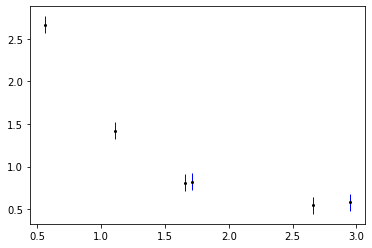

In [19]:
pl.errorbar(x_exp,y_exp,yerr=s_error,lw=0,elinewidth=1,ecolor="b",fmt='ko',markersize=2)

Para saber qué modelo ajustar, necesitamos un buen _prior_

- prior: cualquier cosa que me diga algo sobre lo que estoy observando

Para este ejemplo nuestro _prior_ será suponer que los datos siguen una tendencia que va como
$$
y \propto \frac{1}{x^2}
$$

Entonces el modelo que ajustaremos, siguiendo nuestro _prior_ será:

$$
y(x|a,b) = \frac{a}{x^b}
$$

In [20]:
# Utilizamos nuestro prior y ajustamos el modelo elegido

def power_law(x,a,b):
    return a*x**b

In [21]:
# El prior del prior. Qué parámetros pienso yo que se le ajusta mejor a lo que veo.
vGuess = [2.0,2.0] # Es a ojo 

# Hacemos el ajuste
vParams, aCova = optimize.curve_fit(power_law,x_exp,y_exp,vGuess)
print(vParams)

[ 1.49571875 -1.01473117]


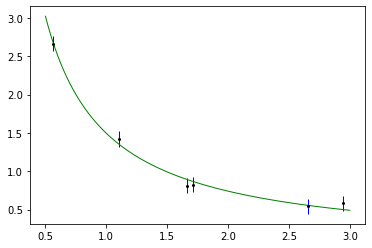

In [22]:
# Plotteamos el ajuste con los datos
x_fine = np.linspace(xmin,xmax,100)
pl.errorbar(x_exp,y_exp,yerr=s_error,lw=0,elinewidth=1,ecolor="b",fmt='ko',markersize=2)
pl.plot(x_fine,power_law(x_fine,*vParams),"g-",lw=1)

In [47]:
# Creamos simulaciones MC para hacer datos exp. sintéticos.
# Para cada simulación obtendremos un valor de a y b.
# Y finalmente obtendre una distribución para a y b, de la cual
# podemos calcular la desviación estandar y ese sería el error.

n_sim = 50000
FitParams = np.array([])

In [48]:
# Empieza el MC
for i in range(n_sim):
    x_sim = np.random.uniform(0.5,3.0,size=np.size(x_exp)) # ojo, esto es otro prior porque no tiene que ser uniforme
    y_gen = vParams[0]*x_sim**vParams[1] # Agarrar el ajuste anterior y ponerlo como prior de las simulaciones.
    y_sim = y_gen + np.random.normal(scale=s_error,size=np.size(y_gen))
    
    try:
        vsims, acova = optimize.curve_fit(power_law,x_sim,y_sim,vGuess)
    except:
        dumdum=1
        continue # Pasa al siguiente loop
        
    if np.size(FitParams) < 1:
        FitParams = np.copy(vsims)
    else:
        FitParams = np.vstack(( FitParams, vsims ))

In [49]:
np.shape(FitParams)
print(FitParams)

[[ 1.58205757 -1.12445833]
 [ 1.49451125 -1.12199903]
 [ 1.57691098 -1.13525178]
 ...
 [ 1.41015016 -0.77027769]
 [ 1.56034798 -1.05451408]
 [ 1.52928579 -0.99394475]]


In [50]:
# Calcular el valor medio de los parámetros a
print ("Para el parámetro a")
print (np.median(FitParams[:,0]))
print (np.std(FitParams[:,0]))

Para el parámetro a
1.494671354859417
0.169980499133506


In [51]:
# Calcular el valor medio de los parámetros b
print ("Para el parámetro b")
print (np.median(FitParams[:,1]))
print (np.std(FitParams[:,1]))

Para el parámetro b
-1.014429233518569
0.14339508928673123


Text(0.5, 0, 'Parámetro a')

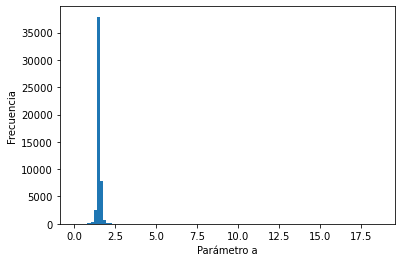

In [52]:
hist_a = pl.hist(FitParams[:,0],bins=100)
pl.ylabel("Frecuencia")
pl.xlabel("Parámetro a")

Text(0.5, 0, 'Parámetro b')

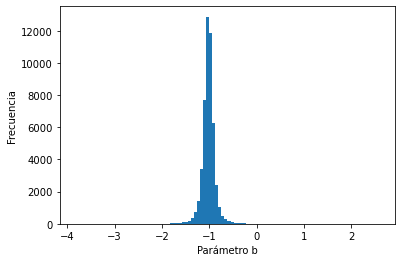

In [53]:
hist_b = pl.hist(FitParams[:,1],bins=100)
pl.ylabel("Frecuencia")
pl.xlabel("Parámetro b")

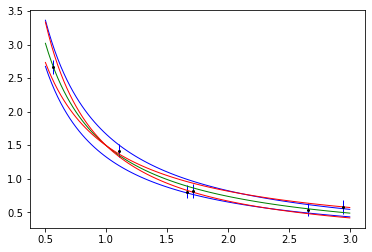

In [57]:
x_fine = np.linspace(xmin,xmax,100)
pl.errorbar(x_exp,y_exp,yerr=s_error,lw=0,elinewidth=1,ecolor="b",fmt='ko',markersize=2)
pl.plot(x_fine,power_law(x_fine,1.494671354859417,-1.014429233518569),"g-",lw=1)
pl.plot(x_fine,power_law(x_fine,1.494671354859417+0.169980499133506,-1.014429233518569),"b-",lw=1)
pl.plot(x_fine,power_law(x_fine,1.494671354859417-0.169980499133506,-1.014429233518569),"b-",lw=1)
pl.plot(x_fine,power_law(x_fine,1.494671354859417,-1.014429233518569+0.14339508928673123),"r-",lw=1)
pl.plot(x_fine,power_law(x_fine,1.494671354859417,-1.014429233518569-0.14339508928673123),"r-",lw=1)